# HarvardX PH526X Homework 2

## A Tic-Tac-Toe Simulation

In [166]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

### Exercise 1: Tic-Tac-Toe create_board() function

In [167]:
def create_board():
    """
    function returns a 3x3 numpy array as the board
    """
    return np.array([[0] * 3 for i in range(3)])

In [168]:
board = create_board()

In [169]:
## test if create_board() works
# board

### Exercise 2: Tic-Tac-Toe place(board, player, position) function

In [170]:
def place(board, player, position):
    """
    function takes 3 parameters:
    board from the create_board() function
    player as represented by 1 or 2
    position as represented by a tuple of indices
    """
    if board[position] == 0:
        board[position] = player
    else:
        print("position already taken!")

In [171]:
## test if place(board, player, position) works
# place(board, 1, (1,1)); board

In [172]:
# place(board, 2, (1,1)); board

### Exercise 3: possibilities(board) function

In [173]:
def possibilities(board):
    """
    using numpy.where function to determine
    which positions on the board are not taken
    returns a list of all the positions untaken
    """
    possibleChoices = zip(*np.where(board == 0))
    return possibleChoices

In [174]:
## test if possibilities(board) works
# possibleChoices

### Exercise 4: random_place(board, player) function

In [175]:
def random_place(board, player):
    """
    function places a marker for the player randomly
    on any of the available positions on the board
    """
    possibleChoices = list(possibilities(board))
    # make sure to remember that the length of possible choices
    # must be greater than 0!!!
    if len(possibleChoices) > 0:
        position = random.choice(possibleChoices)
        place(board, player, position)

In [176]:
## check if random_place(board, player) works
# random_place(board, 2); board

### Exercise 5: place 3 pieces for each player 1 and 2

In [177]:
# use random_place(board, player) to place 3 moves for each player
board = create_board()
for i in range(3):
    for player in [1, 2]:
        random_place(board, player)

In [178]:
board

array([[1, 0, 0],
       [0, 1, 2],
       [1, 2, 2]])

### Exercise 6: function row_win(board, player)

In [179]:
def row_win(board, player):
    """
    function to check if player occupies a certain row
    on the board, and returns True or False
    """
    for row in board:
        if (len(set(row)) == 1) and player in row:
            return True
    return False

### Exercise 7: function col_win(board, player)

In [180]:
def col_win(board, player):
    """
    function to check if player occupies a certain column
    on the board, and returns True or False
    """
    for col in zip(*board):
        if (len(set(col)) == 1) and player in col:
            return True
    return False

### Exercise 8: function diag_win(board, player)

In [181]:
def diag_win(board, player):
    """
    function to check if player occupies a certain diagonal
    on the board, and returns True or False
    """
    width = len(board[0]) - 1
    diag1 = []; diag2 = []
    for i in range(width):
        diag1.append(board[i, i])
        diag2.append(board[i, width - i])
    if (len(set(diag1)) == 1 and player in diag1) or \
       (len(set(diag2)) == 1 and player in diag2):
        return True
    return False

### Exercise 9: function evaluate(board)

In [182]:
def evaluate(board):
    """
    function to check if any of the players has won the game
    and returns 1 or 2; if the board is full and no player
    has won the game, then returns -1; otherwise returns 0
    """
    winner = 0
    for player in [1, 2]:
        # Check if `row_win`, `col_win`, or `diag_win` apply.  if so, store `player` as `winner`.
        if row_win(board, player) or col_win(board, player) or diag_win(board, player):
            winner = player
    if np.all(board != 0) and winner == 0:
        winner = -1
    return winner

### Exercise 10: function play_game()

In [183]:
def play_game():
    """
    function to play the game until a player wins the game
    returns the player that wins the game or -1 for tie
    """
    board =create_board()
    winner = evaluate(board)
    while winner == 0:
        for player in [1,2]:
            random_place(board, player)
            winner = evaluate(board)
    return winner

### Exercise 11: play_game() 1000 times, use time and matplotlib

time used for 1000 games:  0.39978718757629395


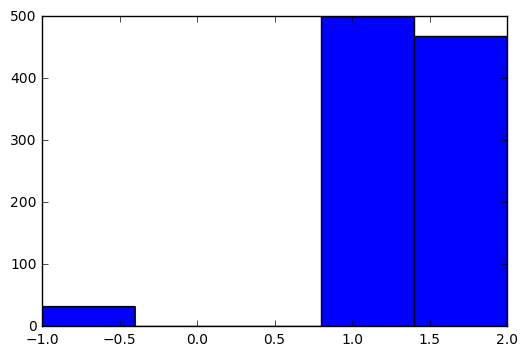

In [190]:
start_time = time.time()
result = []

for i in range(1000):
    result.append(play_game())

end_time = time.time()
print("time used for 1000 games: ", end_time - start_time)

plt.hist(result, bins=5); plt.show()

### Exercise 12: function play_strategic_game()

In [191]:
def play_strategic_game():
    """
    a function that plays Tic-Tac-Toe with tiny improvement
    so that player 1 would always place his initial move
    on the center of the board at (1, 1)
    """
    board, winner = create_board(), 0
    board[1,1] = 1
    while winner == 0:
        for player in [2,1]:
            # use `random_place` to play a game, and store as `board`.
            random_place(board, player)
            # use `evaluate(board)`, and store as `winner`.
            winner = evaluate(board)
            if winner != 0:
                break
    return winner

### Exercise 11: play_game() 1000 times, use time and matplotlib

time used for 1000 games:  0.23473310470581055


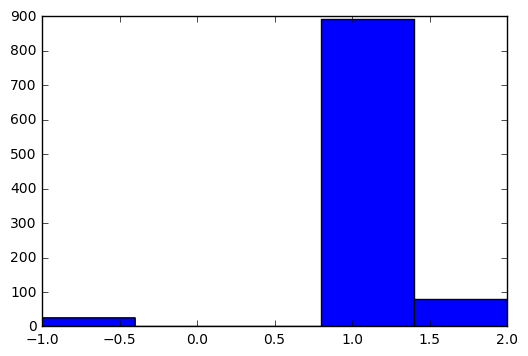

In [192]:
start_time = time.time()
result = []

for i in range(1000):
    result.append(play_strategic_game())

end_time = time.time()
print("time used for 1000 games: ", end_time - start_time)

plt.hist(result, bins=5); plt.show()